In [ ]:
!pip install pandas==1.1.5 --upgrade --quiet

#             USED CARS EDA PROJECT

### INTRODUCTION:



When we talk of Exploratory Data Analysis, EDA, in statistics, we are simply referring to the ability to explore datasets in order to summarise their characteristics using statistical graphics and other visualization methods.

In Data science, perhaps this definition finely puts forward what EDA is all about:

"Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations."
 _Pratheesh Shivaprasad.

From the above two definitions, we can simply put that EDA is all about knowing a given set of data in order to derive reasonable and useful information from it.

The data for this EDA project was gotten from kaggle, one of the world's largest Data science community with powerful tools and resources including real world datasets that can be used for research and learning purposes.

According to the creator of the Dataset, Austin Reese, the data, containing information on used cars for sale, was scraped from craigslist, an American classified advertisement website.

### OUTLINE:



Over the course of this Data Analysis Project, we will be carrying out the procedures as follows:

* Install and import some important Python Data analysis libraries and modules such as Pandas, Numpy.
* Downloading the dataset from kaggle using the Open Dataset library.
* Data cleaning and preparation.
* Data Visualization.
* Asking and Answering some simple questions about the data.
* Summary and future work.
* Reference

### Install And Import Pandas, Numpy, OpenDatasets.

Numpy is a Python library mainly containing Arithmetic operation tools or modules while Pandas is used for operating tabular data such as the one we are looking to explore.

The open dataset library will help us to download the dataset from kaggle simply by inputing the URL of the dataset.

In [ ]:
!pip install numpy --quiet

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od

### Download Dataset From Kaggle.



Downloading any dataset from kaggle has some conditions attached to it. You must have credentials such as username and access key. They will be asked for before you can be able to download the dataset. These can be accessed if you have an account on kaggle

To download the dataset, lets save the dataset URL in a variable and then input the variable into our opendataset module to download.

In [ ]:
cars_url = 'https://www.kaggle.com/austinreese/craigslist-carstrucks-data'

In [ ]:
od.download(cars_url)

  0%|          | 0.00/262M [00:00<?, ?B/s]

100%|██████████| 262M/262M [00:02<00:00, 116MB/s]


After the download, we can view the csv file by clicking on the files tab on the left hand panel. 

We will also save this in a new variable.

In [ ]:
cars_csv = 'craigslist-carstrucks-data/vehicles.csv'

Let us have a look at the size of the dataset.

In [ ]:
!ls -lh craigslist-carstrucks-data

total 1.4G
-rw-r--r-- 1 root root 1.4G Jun 30 22:47 vehicles.csv


We can see from the cell above that the size of the dataframe is 1.4G

How long would it take to load this dataset as a pandas dataframe?

In [ ]:
%%time
cars_df = pd.read_csv(cars_csv)

CPU times: user 13.3 s, sys: 3.64 s, total: 17 s
Wall time: 16.9 s


Lets have a view of the dataset

In [ ]:
cars_df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


### Data Cleaning And Preparation

In [ ]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

Using the .info() property of pandas, we can see that the dataset contains over 400 thousand rows and 26 columns. It also displays the various data types in the dataset and the number of none null or non-empty rows. 

Because of how massive the dataset is, it is possible that we may run out of computer memory to handle this dataset. This is why we will have to install the pyarrow library, where we will be able to save and load the data using a format called feather. This format ensures efficiency and faster processing.

In [ ]:
!pip install pyarrow --upgrade --q

     |████████████████████████████████| 21.9MB 11.7MB/s 


In [ ]:
%%time
cars_df.to_feather('cars.feather')

CPU times: user 6.56 s, sys: 3.59 s, total: 10.2 s
Wall time: 9.95 s


In [ ]:
!ls -lh cars.feather


-rw-r--r-- 1 root root 392M Jun 30 22:58 cars.feather


We can now see that the loading time has reduced from about 16 seconds to about 9.5 seconds. 

Also the weight has reduced from 1.4Gig to about 400mb.

Lets create a new variable for the new dataset

In [ ]:
cars2_df = pd.read_feather('cars.feather')

In [ ]:
cars2_df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,None,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,NaN,az,NaN,NaN,None
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,None,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,NaN,ar,NaN,NaN,None
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,None,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,NaN,fl,NaN,NaN,None
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,None,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,NaN,ma,NaN,NaN,None
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,None,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,NaN,nc,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,None,sedan,None,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,None,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,None,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,None,diesel,4174.0,clean,other,1GYFZFR46LF088296,None,None,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,None,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


Lets drop some of the columns that will not be useful for our analysis

In [ ]:
cars2_df.drop(['id','url','region_url','transmission','description','VIN','size','image_url','county','posting_date'], 
              axis=1, inplace=True)

We will also remove all rows that do not contain any data i.e all rows with NaN values

In [ ]:
cars3_df = cars2_df.dropna()

In [ ]:
cars3_df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,drive,type,paint_color,state,lat,long
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,rwd,truck,black,al,32.592000,-85.518900
32,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,4wd,pickup,black,al,32.590000,-85.480000
33,auburn,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,4wd,pickup,silver,al,32.590000,-85.480000
34,auburn,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,4wd,truck,grey,al,32.601300,-85.443974
35,auburn,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,4wd,pickup,red,al,32.590000,-85.480000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426859,wyoming,48590,2020.0,cadillac,xt6 premium luxury,good,6 cylinders,gas,7701.0,clean,fwd,other,black,wy,33.779214,-84.411811
426860,wyoming,39990,2017.0,infiniti,qx80 sport utility 4d,good,8 cylinders,gas,41664.0,clean,4wd,other,black,wy,33.779214,-84.411811
426866,wyoming,32990,2016.0,infiniti,qx80 sport utility 4d,good,8 cylinders,gas,55612.0,clean,rwd,other,black,wy,33.779214,-84.411811
426874,wyoming,33590,2018.0,lexus,gs 350 sedan 4d,good,6 cylinders,gas,30814.0,clean,rwd,sedan,white,wy,33.779214,-84.411811


Lets see the new look of our dataset

In [ ]:
cars3_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115446 entries, 31 to 426878
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        115446 non-null  object 
 1   price         115446 non-null  int64  
 2   year          115446 non-null  float64
 3   manufacturer  115446 non-null  object 
 4   model         115446 non-null  object 
 5   condition     115446 non-null  object 
 6   cylinders     115446 non-null  object 
 7   fuel          115446 non-null  object 
 8   odometer      115446 non-null  float64
 9   title_status  115446 non-null  object 
 10  drive         115446 non-null  object 
 11  type          115446 non-null  object 
 12  paint_color   115446 non-null  object 
 13  state         115446 non-null  object 
 14  lat           115446 non-null  float64
 15  long          115446 non-null  float64
dtypes: float64(4), int64(1), object(11)
memory usage: 15.0+ MB


We will convert the "year" column to an int16 data type. 

In [ ]:
cars3_df.astype({"year":"int16"}).dtypes

region           object
price             int64
year              int16
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
drive            object
type             object
paint_color      object
state            object
lat             float64
long            float64
dtype: object

In [ ]:
cars3_df.describe()

,price,year,odometer,lat,long
count,1.154460e+05,115446.000000,1.154460e+05,115446.000000,115446.000000
mean,6.088444e+04,2009.544757,1.119571e+05,38.441055,-92.276820
std,1.149255e+07,9.608423,2.201927e+05,5.523153,17.397373
min,0.000000e+00,1900.000000,0.000000e+00,-81.838232,-159.719900
25%,5.700000e+03,2006.000000,5.552525e+04,34.977100,-103.198130
50%,1.099500e+04,2012.000000,1.028300e+05,39.286850,-86.260000
75%,2.290000e+04,2015.000000,1.478000e+05,42.244100,-79.984705
max,3.736929e+09,2022.000000,1.000000e+07,82.252826,139.691700


From the numeric description above, we can see that, under the 'year' column, the least(min) year is 1900 while the earliest(max) is 2022. But we are in 2021 and its almost impossible to have cars from way back 1900 still present and up for sale at a price in this present time.

Let's have a look at some of the cars presented as being from 1900 and also made in 2022 and see how reliable this information is.

In [ ]:
cars3_df.loc[cars3_df['year']== 1900]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,drive,type,paint_color,state,lat,long
42454,orange county,38250,1900.0,acura,rdx,new,4 cylinders,gas,4500.0,clean,4wd,SUV,silver,ca,33.621789,-117.724006


From further research, its obvious that the Acura rdx is not a 1900 vehicle and its model years, infact, started from 2007.

In [ ]:
cars3_df.loc[cars3_df['year']== 2022]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,drive,type,paint_color,state,lat,long
65612,stockton,3500,2022.0,toyota,mighty max,fair,4 cylinders,gas,180000.0,clean,fwd,truck,white,ca,37.738300,-121.434500
165048,"kansas city, MO",30850,2022.0,mitsubishi,eclipse cross se,new,4 cylinders,gas,10.0,clean,fwd,SUV,blue,ks,38.967626,-94.516786
167095,"kansas city, MO",27725,2022.0,mitsubishi,eclipse cross se,new,4 cylinders,diesel,1.0,clean,fwd,SUV,silver,ks,38.952800,-94.470500
225238,bozeman,12345,2022.0,chevrolet,silverado,fair,12 cylinders,gas,1000000.0,clean,4wd,truck,purple,mt,45.423000,-112.173500


Researching on the Chevrolet silverado, considering the price tag and the odometer reading on this dataset, it is obvious that this is not a 2022 vehicle.
Although 2022 cars are currently being advertised, the only reason they are on this dataset will likely be for sales booking, hence, the 'year' column of this dataset might not be completely reliable for analysis.

Also, the maximum price in the cars3_df is over 3 Billion while the least price is 0, which is impossible since this is a car selling, not gifting, site. Let's see what car that is.

In [ ]:
cars3_df.loc[cars3_df['price']>3000000000]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,drive,type,paint_color,state,lat,long
318592,eugene,3736928711,2007.0,toyota,tundra,excellent,8 cylinders,gas,164000.0,clean,4wd,pickup,silver,or,44.066092,-124.037561


From research, the latest Toyota Tundra is the 2021 model and its price is not more than $80,000.
The only explanation to this is that there was likely a data input error.
Lets have a look at the top 5 most expensive vehicles.

In [ ]:
cars3_df.sort_values(by=['price'], ascending= False).head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,drive,type,paint_color,state,lat,long
318592,eugene,3736928711,2007.0,toyota,tundra,excellent,8 cylinders,gas,164000.0,clean,4wd,pickup,silver,or,44.066092,-124.037561
29386,humboldt county,1111111111,1999.0,ford,f350 super duty lariat,good,8 cylinders,diesel,149000.0,clean,rwd,pickup,white,ca,40.946500,-124.083400
230753,asheville,135008900,2008.0,nissan,titan se kingcab,like new,8 cylinders,gas,110500.0,clean,4wd,truck,grey,nc,35.637151,-83.092004
137807,spokane / coeur d'alene,123456789,1999.0,buick,regal,like new,6 cylinders,gas,96000.0,clean,fwd,sedan,white,id,47.695200,-117.365800
307488,stillwater,123456789,1996.0,gmc,sierra 2500,fair,8 cylinders,gas,320000.0,clean,4wd,pickup,black,ok,36.703100,-97.078400


The most expensive car in the world right now is the $70,000,000 1963 Ferrari 250 GTO. Hence there is a likely input error. Because of this, we will be considering only vehicles whose prices are below 1 million.

In [ ]:
cars3_df = cars3_df.loc[cars3_df['price'] <= 1000000]

What cars have the zero price tag?

In [ ]:
cars3_df.loc[cars3_df['price']== 0]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,drive,type,paint_color,state,lat,long
126,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,68472.0,clean,rwd,van,white,al,31.425091,-85.617723
127,auburn,0,2019.0,chevrolet,express cargo van,like new,6 cylinders,gas,69125.0,clean,rwd,van,white,al,31.425091,-85.617723
128,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,66555.0,clean,rwd,van,white,al,31.425091,-85.617723
191,birmingham,0,2015.0,nissan,sentra,excellent,4 cylinders,gas,99505.0,clean,fwd,sedan,silver,al,33.614088,-85.796729
239,birmingham,0,2019.0,chevrolet,silverado 1500,excellent,8 cylinders,gas,25127.0,clean,4wd,truck,red,al,33.614088,-85.796729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424493,milwaukee,0,2011.0,chevrolet,equinox,excellent,4 cylinders,gas,161237.0,clean,fwd,wagon,black,wi,43.302071,-88.376508
425403,sheboygan,0,2013.0,gmc,acadia,excellent,6 cylinders,gas,152207.0,clean,4wd,SUV,red,wi,44.078180,-87.696800
426525,wyoming,0,1973.0,rover,defender,excellent,4 cylinders,diesel,48000.0,clean,4wd,SUV,yellow,wy,41.295500,-96.100800
426539,wyoming,0,2016.0,toyota,4runner trd pro,excellent,6 cylinders,gas,45286.0,clean,4wd,SUV,brown,wy,45.082421,-94.334718


Cars with $0 price tag may likely have been booked.

Let us drop all prices = 0

In [ ]:
cars3_df = cars3_df[cars3_df.price!= 0]

In [ ]:
cars3_df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,drive,type,paint_color,state,lat,long
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,rwd,truck,black,al,32.592000,-85.518900
32,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,4wd,pickup,black,al,32.590000,-85.480000
33,auburn,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,4wd,pickup,silver,al,32.590000,-85.480000
34,auburn,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,4wd,truck,grey,al,32.601300,-85.443974
35,auburn,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,4wd,pickup,red,al,32.590000,-85.480000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426859,wyoming,48590,2020.0,cadillac,xt6 premium luxury,good,6 cylinders,gas,7701.0,clean,fwd,other,black,wy,33.779214,-84.411811
426860,wyoming,39990,2017.0,infiniti,qx80 sport utility 4d,good,8 cylinders,gas,41664.0,clean,4wd,other,black,wy,33.779214,-84.411811
426866,wyoming,32990,2016.0,infiniti,qx80 sport utility 4d,good,8 cylinders,gas,55612.0,clean,rwd,other,black,wy,33.779214,-84.411811
426874,wyoming,33590,2018.0,lexus,gs 350 sedan 4d,good,6 cylinders,gas,30814.0,clean,rwd,sedan,white,wy,33.779214,-84.411811


Let us also consider vehicles from 1950 to 2021 only

In [ ]:
cars3_df = cars3_df[cars3_df.year > 1949]

In [ ]:
cars3_df = cars3_df[cars3_df.year < 2022]

Lets have a statistical analysis of the data now, using pandas' .describe() property.

In [ ]:
cars3_df.describe()

,price,year,odometer,lat,long
count,110811.000000,110811.000000,1.108110e+05,110811.000000,110811.000000
mean,15977.569619,2009.616726,1.109424e+05,38.501041,-92.205990
std,13357.118319,8.861745,1.765092e+05,5.552744,17.462606
min,1.000000,1950.000000,0.000000e+00,-81.838232,-159.719900
25%,6000.000000,2006.000000,5.630200e+04,35.060000,-104.547200
50%,11500.000000,2012.000000,1.035500e+05,39.420000,-86.138523
75%,23500.000000,2015.000000,1.487480e+05,42.270000,-79.952901
max,195000.000000,2021.000000,1.000000e+07,82.252826,139.691700


Let us explore some of the columns and get information such as the unique values and counts.

What are the various types of vehicles in the dataset?

In [ ]:
cars3_df.type.unique()

array(['truck', 'pickup', 'other', 'coupe', 'mini-van', 'SUV', 'sedan',
       'offroad', 'convertible', 'hatchback', 'wagon', 'van', 'bus'],
      dtype=object)

What are the number of manufacturers?

In [ ]:
cars3_df.manufacturer.nunique()

41

In [ ]:
cars3_df.fuel.nunique()

5

What types of fuel are being used by the vehicles?

In [ ]:
cars3_df.fuel.unique()

array(['gas', 'diesel', 'other', 'hybrid', 'electric'], dtype=object)

How many regions are listed in the dataset?

In [ ]:
cars3_df.region.nunique()

403

In [ ]:
cars3_df.state.nunique()

51

The 'column' having 51 unique values shows the 50 states of U.S and Washington D.C

What are the unique conditions of the vehicles?

In [ ]:
cars3_df.condition.unique()

array(['excellent', 'good', 'new', 'fair', 'like new', 'salvage'],
      dtype=object)

What are the vehicle drive types?

In [ ]:
cars3_df.drive.unique()

array(['rwd', '4wd', 'fwd'], dtype=object)

So, at the end of our data cleaning and exploration, we were able to reduce the size and memory usage of our huge dataset by converting it to a feather format.

We were also able to drop some not so relevant columns and rows, hence reducing further the size of the dataset.

We also explored some of the columns in the dataset to gain more insight as to the kind of data we are dealing with.

### Data Visualization

Let us do a bit of visualization while answering some questions.

First step would be to import relevant visualization libraries. These include Matplotlip, seaborn and plotly. I find plotly most interesting to use because of its interactive nature.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import seaborn as sns

In [ ]:
!pip install plotly --upgrade --q

     |████████████████████████████████| 20.6MB 6.6MB/s 


In [ ]:
import plotly.express as px

Lets create a treemap that shows the kind of fuel used by vehicles in each state as well as the cumulative price of all vehicles for sale in such states. 

In [ ]:
fig = px.treemap(cars3_df, 
                 path = ['state','fuel'], 
                 values='price',
                 color='odometer', 
                 color_continuous_scale='gnbu')

fig.show()


From this treemap graph above alone, we can derive some insights already from our dataset:

* Most cars on this cars selling platform run on gas or petrol.
* From the colors, the vehicles that use Diesel have a higher mileage which means they could be long distance journey vehicles.
* The state of California has the highest sum for price of cars followed by florida, New York and Texas. These are among states with the highest population in the U.S so it won't be a surprise to see more cars there for sale.

Lets work on a sample of the cars_df of length 10,000

In [ ]:
cars_sample = cars3_df.sample(n = 10000)

In [ ]:
cars_sample

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,drive,type,paint_color,state,lat,long
419654,madison,11900,2009.0,nissan,rogue,good,4 cylinders,gas,35655.0,clean,4wd,wagon,silver,wi,43.029559,-89.397796
65604,stockton,22590,2015.0,hyundai,genesis 3.8 sedan 4d,good,6 cylinders,gas,51933.0,clean,rwd,sedan,silver,ca,33.786500,-84.445400
32609,inland empire,7975,2013.0,ford,c-max hybrid,excellent,4 cylinders,hybrid,139000.0,clean,fwd,hatchback,blue,ca,34.070612,-117.383384
193827,ann arbor,8000,2004.0,toyota,4runner,excellent,6 cylinders,gas,225000.0,clean,4wd,SUV,white,mi,42.508365,-83.530545
129315,hawaii,23500,2011.0,toyota,sequoia sr5,excellent,8 cylinders,gas,156000.0,clean,rwd,SUV,grey,hi,21.348800,-157.875900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74866,colorado springs,10500,2007.0,gmc,sierra 1500,good,8 cylinders,gas,165000.0,lien,4wd,pickup,grey,co,38.885100,-104.794100
279769,rochester,26995,2017.0,gmc,savana cargo van,good,8 cylinders,other,42763.0,clean,rwd,van,white,ny,43.220454,-77.819038
191764,worcester / central MA,1450,2000.0,acura,tl,good,6 cylinders,gas,208550.0,clean,fwd,sedan,black,ma,42.242556,-71.822519
142287,chicago,2500,2001.0,honda,civic ex sedan,good,4 cylinders,gas,179000.0,clean,fwd,sedan,black,il,41.725700,-87.556000


What is the price ranges/distribution?

We can answer this using a histogram plot from plotly

In [ ]:
fig = px.histogram(cars_sample, x = "price", nbins= 20, title= "Price Distribution")
fig.update_layout(
    font_family = "Courier New",
    font_size = 20,
    title_font_family = "Arial",
    title_font_size = 30,
    font_color = "green"
)
fig.show()

What type of vehicle are most available?

The .unique() property in pandas can give us unique values of a dataset column. It is especially useful when the values are discrete.

In [ ]:
cars_sample.type.unique()

array(['wagon', 'sedan', 'hatchback', 'SUV', 'offroad', 'convertible',
       'mini-van', 'truck', 'pickup', 'coupe', 'van', 'bus', 'other'],
      dtype=object)

Using the .value_counts() property, we can get the total number of vehicles for each vehicle type. This is what we have done below.

In [ ]:
cars_sample.type.value_counts()

sedan          2605
SUV            2430
truck          1316
pickup         1096
coupe           700
hatchback       387
van             312
convertible     289
wagon           285
other           269
mini-van        250
offroad          42
bus              19
Name: type, dtype: int64

Lets create a dataframe of the vehicle types and the number of counts.

In [ ]:
type_df = pd.DataFrame(cars_sample.type.value_counts().reset_index())

In [ ]:
type_df

,index,type
0,sedan,2605
1,SUV,2430
2,truck,1316
3,pickup,1096
4,coupe,700
5,hatchback,387
6,van,312
7,convertible,289
8,wagon,285
9,other,269


Let's give the columns more appropriate names

In [ ]:
type_df.columns = ["Vehicle type","counts"]

In [ ]:
type_df

,Vehicle type,counts
0,sedan,2605
1,SUV,2430
2,truck,1316
3,pickup,1096
4,coupe,700
5,hatchback,387
6,van,312
7,convertible,289
8,wagon,285
9,other,269


We will represent this in a barplot.

In [ ]:
fig = px.bar(type_df,
             x= "Vehicle type",
             y = "counts",
             title= "Vehicle Types And Their Numbers"
             )

fig.show()

The sedan and the SUVs seem to be the most advertised vehicles, meaning they are the type of cars mostly purchased or liked by Americans.

How about the manufacturer with the most car on this site.

We can use the pandas groupby method to gain insights into a particular column and its values. In this case, we are grouping the "manufacturer" column of our dataset and using the "type" column, we get the number of vehicles for each manufacturer.

In [ ]:
manufacturer_df = cars_sample.groupby('manufacturer')[['type']].count()

In [ ]:
manufacturer_df

,type
manufacturer,
acura,98
alfa-romeo,5
audi,115
bmw,292
buick,113
cadillac,149
chevrolet,1503
chrysler,187
datsun,1


We will change the column name 'type' to 'counts'.

In [ ]:
manufacturer_df.columns = ['counts']

In [ ]:
manufacturer_df

,counts
manufacturer,
acura,98
alfa-romeo,5
audi,115
bmw,292
buick,113
cadillac,149
chevrolet,1503
chrysler,187
datsun,1


We will convert the manufacturer dataframe index, which contains the manufacturers' names, to an array in order to be able to use it to create a piechart.

In [ ]:
Types = np.array(manufacturer_df.index)

In [ ]:
fig = px.pie(manufacturer_df, 
             values = 'counts' , 
             names = Types , 
             title = "Distribution Of Vehicle By Manufacturers")
fig.show()

The Ford vehicle manufacturer has the most cars on this car selling site, as seen from the piechart.

In [ ]:
cars_sample

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,drive,type,paint_color,state,lat,long
419654,madison,11900,2009.0,nissan,rogue,good,4 cylinders,gas,35655.0,clean,4wd,wagon,silver,wi,43.029559,-89.397796
65604,stockton,22590,2015.0,hyundai,genesis 3.8 sedan 4d,good,6 cylinders,gas,51933.0,clean,rwd,sedan,silver,ca,33.786500,-84.445400
32609,inland empire,7975,2013.0,ford,c-max hybrid,excellent,4 cylinders,hybrid,139000.0,clean,fwd,hatchback,blue,ca,34.070612,-117.383384
193827,ann arbor,8000,2004.0,toyota,4runner,excellent,6 cylinders,gas,225000.0,clean,4wd,SUV,white,mi,42.508365,-83.530545
129315,hawaii,23500,2011.0,toyota,sequoia sr5,excellent,8 cylinders,gas,156000.0,clean,rwd,SUV,grey,hi,21.348800,-157.875900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74866,colorado springs,10500,2007.0,gmc,sierra 1500,good,8 cylinders,gas,165000.0,lien,4wd,pickup,grey,co,38.885100,-104.794100
279769,rochester,26995,2017.0,gmc,savana cargo van,good,8 cylinders,other,42763.0,clean,rwd,van,white,ny,43.220454,-77.819038
191764,worcester / central MA,1450,2000.0,acura,tl,good,6 cylinders,gas,208550.0,clean,fwd,sedan,black,ma,42.242556,-71.822519
142287,chicago,2500,2001.0,honda,civic ex sedan,good,4 cylinders,gas,179000.0,clean,fwd,sedan,black,il,41.725700,-87.556000


With the aide of a seaborn scatterplot, let us view the relationship between the price of a vehicle and its mileage i.e odometer reading.

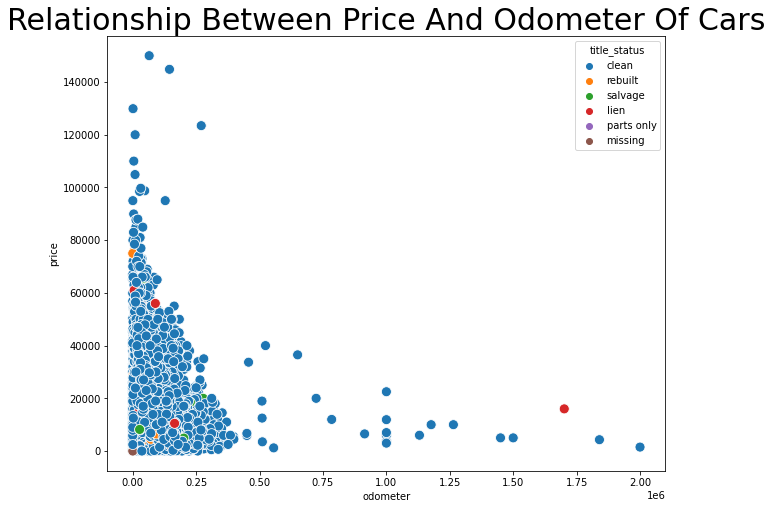

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Relationship Between Price And Odometer Of Cars", fontsize= 30)
sns.scatterplot(x = cars_sample.odometer, 
                y= cars_sample.price, 
                hue = cars_sample.title_status,
                s = 100);

From the scatterplot above, observing the two extreme points on both axis, we can see that a lower odometer value attracts good price and vice versa.

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/sulenas/eda-project


'https://jovian.ai/sulenas/eda-project'

Next, we will answer some simple questions about the dataframe.

### Asking And Answering Simple Questions

##### Q1: WHICH STATE HAS THE MOST VEHICLES?

In [ ]:
cars3_df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,drive,type,paint_color,state,lat,long
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,rwd,truck,black,al,32.592000,-85.518900
32,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,4wd,pickup,black,al,32.590000,-85.480000
33,auburn,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,4wd,pickup,silver,al,32.590000,-85.480000
34,auburn,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,4wd,truck,grey,al,32.601300,-85.443974
35,auburn,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,4wd,pickup,red,al,32.590000,-85.480000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426859,wyoming,48590,2020.0,cadillac,xt6 premium luxury,good,6 cylinders,gas,7701.0,clean,fwd,other,black,wy,33.779214,-84.411811
426860,wyoming,39990,2017.0,infiniti,qx80 sport utility 4d,good,8 cylinders,gas,41664.0,clean,4wd,other,black,wy,33.779214,-84.411811
426866,wyoming,32990,2016.0,infiniti,qx80 sport utility 4d,good,8 cylinders,gas,55612.0,clean,rwd,other,black,wy,33.779214,-84.411811
426874,wyoming,33590,2018.0,lexus,gs 350 sedan 4d,good,6 cylinders,gas,30814.0,clean,rwd,sedan,white,wy,33.779214,-84.411811


We will represent this in a dataframe using pd.DataFrame. Using the .value_counts() property on the "states" column, we can solve this question.

In [ ]:
state_counts = pd.DataFrame(cars3_df.state.value_counts().reset_index())

Lets rename the columns

In [ ]:
state_counts.columns = ["state","counts"]

In [ ]:
state_counts

,state,counts
0,ca,12119
1,fl,7877
2,ny,6352
3,tx,5430
4,oh,5096
5,mi,4303
6,pa,4189
7,nc,4170
8,wi,3726
9,va,2949


Lets represent this in a matplotlib bar graph.

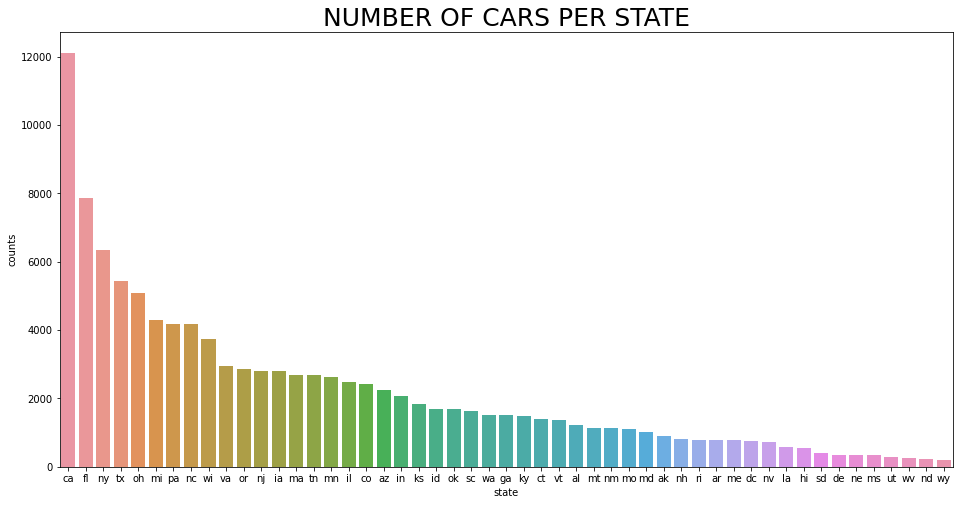

In [ ]:
plt.figure(figsize=(16,8))
plt.title("NUMBER OF CARS PER STATE", fontsize= 25)
sns.barplot(x = state_counts.state, y = state_counts.counts, data = state_counts);

From the barplot above, we can see that California has the highest number of listed cars.

This confirms our earlier assumption from the treemap that there is higher cummulative price of vehicles in the state of California because there are more cars there, mainly due to the population.

##### Q2: WHICH HAS BEEN THE MOST EXPENSIVE CAR SINCE 2010?

To answer this, lets have a look at the number of car model years we are dealing with here.

In [ ]:
cars3_df.year.nunique()

72

Now lets consider car model years from 2010

In [ ]:
cars_recent = cars3_df.loc[cars3_df['year'] > 2009]

In [ ]:
cars_recent

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,drive,type,paint_color,state,lat,long
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,rwd,truck,black,al,32.592000,-85.518900
32,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,4wd,pickup,black,al,32.590000,-85.480000
33,auburn,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,4wd,pickup,silver,al,32.590000,-85.480000
34,auburn,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,4wd,truck,grey,al,32.601300,-85.443974
35,auburn,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,4wd,pickup,red,al,32.590000,-85.480000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426859,wyoming,48590,2020.0,cadillac,xt6 premium luxury,good,6 cylinders,gas,7701.0,clean,fwd,other,black,wy,33.779214,-84.411811
426860,wyoming,39990,2017.0,infiniti,qx80 sport utility 4d,good,8 cylinders,gas,41664.0,clean,4wd,other,black,wy,33.779214,-84.411811
426866,wyoming,32990,2016.0,infiniti,qx80 sport utility 4d,good,8 cylinders,gas,55612.0,clean,rwd,other,black,wy,33.779214,-84.411811
426874,wyoming,33590,2018.0,lexus,gs 350 sedan 4d,good,6 cylinders,gas,30814.0,clean,rwd,sedan,white,wy,33.779214,-84.411811


Using the groupby method, we can figure out the maximum price in each year.

In [ ]:
most_expensive = cars_recent.groupby('year')[['price']].max()

In [ ]:
most_expensive

,price
year,
2010.0,169999
2011.0,95000
2012.0,120000
2013.0,144832
2014.0,131500
2015.0,140000
2016.0,103500
2017.0,195000
2018.0,165000


Lets sort them in descending order using sort_values property of pandas.

In [ ]:
most_expensive.sort_values(by='price', ascending=False)

,price
year,
2017.0,195000
2010.0,169999
2018.0,165000
2020.0,155000
2013.0,144832
2015.0,140000
2014.0,131500
2019.0,130000
2021.0,128945


Lets have a look at what type of vehicle is this 195000.

In [ ]:
expensive_car = cars3_df.loc[cars3_df['price']== 195000]
expensive_car

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,drive,type,paint_color,state,lat,long
201823,grand rapids,195000,2017.0,subaru,wrx,like new,4 cylinders,gas,73000.0,lien,4wd,sedan,grey,mi,42.9104,-85.8276


So, the subaru	wrx is the most expensive car up for sale since 2010 from our dataframe. Remember that we have dropped some rows from our Dataframe, hence, in reality, this might not necessarily be the most expensive car out there since 2010.

Using folium, we can have a view of the region where this car is located on a map. From the "expensive_car" dataset above, we can see that this car is located at latitude 42.9104 and longitude -85.8276.

First, we will install and import the folium library.

In [ ]:
!pip install folium --q

In [ ]:
import folium

In our map, we will be adding a clickable marker to show the exact location using folium.marker.

In [ ]:
m = folium.Map(location=[42.9104,	-85.8276], zoom_start= 10, tiles="stamen terrain")

tooltip = "click"

folium.Marker(
    [42.9104,	-85.8276], popup="<i>Grand Rapids, Michigan</i>", tooltip=tooltip
).add_to(m)

m

From the map, we can see the Grand rapids region.

##### Q3: USING THE ODOMETER READING, WHICH IS THE MOST TRAVELLED TYPE OF VEHICLE?

We will first sort out the dataframe by the highest odometer value and look at the first 100.

In [ ]:
most_travelled = cars3_df.sort_values(by='odometer', ascending=False).head(100)
most_travelled

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,drive,type,paint_color,state,lat,long
191629,western massachusetts,7500,1970.0,chevrolet,chevelle,fair,8 cylinders,gas,10000000.0,parts only,rwd,coupe,red,ma,42.542900,-72.532800
260971,albuquerque,4000,1973.0,jeep,cj5,good,8 cylinders,gas,10000000.0,clean,4wd,offroad,black,nm,35.150898,-106.615356
305172,oklahoma city,4500,1995.0,chevrolet,impala ss 1995,fair,8 cylinders,gas,10000000.0,clean,rwd,sedan,custom,ok,35.796482,-97.674127
208157,northern michigan,9000,1975.0,chevrolet,monza 2+2,good,8 cylinders,gas,10000000.0,clean,rwd,hatchback,red,mi,44.584980,-85.535603
28738,gold country,20000,1951.0,chevrolet,coe,good,8 cylinders,gas,10000000.0,clean,rwd,truck,custom,ca,37.956759,-120.311279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258932,south jersey,4800,2009.0,chrysler,town & country,new,6 cylinders,gas,1225000.0,clean,4wd,sedan,grey,nj,39.972300,-75.060700
151648,indianapolis,6495,2010.0,chrysler,town country touring,good,6 cylinders,gas,1200290.0,clean,fwd,mini-van,red,in,39.925801,-85.344455
53805,sacramento,12000,1965.0,ford,thunderbird,good,other,gas,1200000.0,clean,fwd,other,custom,ca,38.941300,-122.011100
138186,spokane / coeur d'alene,1500,2000.0,ford,windstar limited,fair,6 cylinders,gas,1195885.0,clean,fwd,van,red,id,47.652600,-117.329900


In [ ]:
most_travelled.value_counts("type")

type
sedan        20
SUV          18
truck        15
pickup       13
coupe        12
offroad       5
wagon         4
other         4
hatchback     4
van           3
mini-van      2
dtype: int64

Looks like the sedans are still the most travelled, obviously they are the most used. It is closely followed by the SUV.

##### Q4: WHAT ARE THE NUMBER OF  WHEEL DRIVE MODELS ADOPTED BY MANUFACTURERS?

In this question, we are trying to count the number of drive models by each vehicle manufacturer. We know that the "drive" column is a categorical column of 3 unique values, 4wd, rwd and fwd. Hence we will use the OneHot encoding system to create additional columns that will identify the type of wheel drive for each vehicle. The OneHot strategy converts a value to 1 if it is a yes for the drive type and 0 otherwise. This will make it easier to sum up.

In [ ]:
cars3_df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,drive,type,paint_color,state,lat,long
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,rwd,truck,black,al,32.592000,-85.518900
32,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,4wd,pickup,black,al,32.590000,-85.480000
33,auburn,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,4wd,pickup,silver,al,32.590000,-85.480000
34,auburn,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,4wd,truck,grey,al,32.601300,-85.443974
35,auburn,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,4wd,pickup,red,al,32.590000,-85.480000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426859,wyoming,48590,2020.0,cadillac,xt6 premium luxury,good,6 cylinders,gas,7701.0,clean,fwd,other,black,wy,33.779214,-84.411811
426860,wyoming,39990,2017.0,infiniti,qx80 sport utility 4d,good,8 cylinders,gas,41664.0,clean,4wd,other,black,wy,33.779214,-84.411811
426866,wyoming,32990,2016.0,infiniti,qx80 sport utility 4d,good,8 cylinders,gas,55612.0,clean,rwd,other,black,wy,33.779214,-84.411811
426874,wyoming,33590,2018.0,lexus,gs 350 sedan 4d,good,6 cylinders,gas,30814.0,clean,rwd,sedan,white,wy,33.779214,-84.411811


We will be working with just a few of the columns from the original dataset.

In [ ]:
cars4 = cars3_df[["price","year","manufacturer","type","drive","state"]]

In [ ]:
cars4

,price,year,manufacturer,type,drive,state
31,15000,2013.0,ford,truck,rwd,al
32,27990,2012.0,gmc,pickup,4wd,al
33,34590,2016.0,chevrolet,pickup,4wd,al
34,35000,2019.0,toyota,truck,4wd,al
35,29990,2016.0,chevrolet,pickup,4wd,al
...,...,...,...,...,...,...
426859,48590,2020.0,cadillac,other,fwd,wy
426860,39990,2017.0,infiniti,other,4wd,wy
426866,32990,2016.0,infiniti,other,rwd,wy
426874,33590,2018.0,lexus,sedan,rwd,wy


In [ ]:
pd.set_option("max_columns", None)

Now lets implement the OneHot code using the .get_dummies() method.

In [ ]:
cars_OneHot = pd.get_dummies(cars4, columns= ["drive"], prefix= "Drive_type")
cars_OneHot

,price,year,manufacturer,type,state,Drive_type_4wd,Drive_type_fwd,Drive_type_rwd
31,15000,2013.0,ford,truck,al,0,0,1
32,27990,2012.0,gmc,pickup,al,1,0,0
33,34590,2016.0,chevrolet,pickup,al,1,0,0
34,35000,2019.0,toyota,truck,al,1,0,0
35,29990,2016.0,chevrolet,pickup,al,1,0,0
...,...,...,...,...,...,...,...,...
426859,48590,2020.0,cadillac,other,wy,0,1,0
426860,39990,2017.0,infiniti,other,wy,1,0,0
426866,32990,2016.0,infiniti,other,wy,0,0,1
426874,33590,2018.0,lexus,sedan,wy,0,0,1


In [ ]:
cars_OneHot["drive"] = cars4.drive
cars_OneHot

,price,year,manufacturer,type,state,Drive_type_4wd,Drive_type_fwd,Drive_type_rwd,drive
31,15000,2013.0,ford,truck,al,0,0,1,rwd
32,27990,2012.0,gmc,pickup,al,1,0,0,4wd
33,34590,2016.0,chevrolet,pickup,al,1,0,0,4wd
34,35000,2019.0,toyota,truck,al,1,0,0,4wd
35,29990,2016.0,chevrolet,pickup,al,1,0,0,4wd
...,...,...,...,...,...,...,...,...,...
426859,48590,2020.0,cadillac,other,wy,0,1,0,fwd
426860,39990,2017.0,infiniti,other,wy,1,0,0,4wd
426866,32990,2016.0,infiniti,other,wy,0,0,1,rwd
426874,33590,2018.0,lexus,sedan,wy,0,0,1,rwd


We will add the original drive column back to the cars_OneHot df.

Next, we will create a dataframe grouped by the manufacturer names.

In [ ]:
manufacturer_DriveType = cars_OneHot.groupby('manufacturer')[["Drive_type_4wd", "Drive_type_fwd", "Drive_type_rwd"]].sum()

In [ ]:
manufacturer_DriveType

,Drive_type_4wd,Drive_type_fwd,Drive_type_rwd
manufacturer,,,
acura,366.0,804.0,29.0
alfa-romeo,13.0,3.0,29.0
aston-martin,0.0,0.0,5.0
audi,1010.0,205.0,20.0
bmw,1404.0,150.0,1572.0
buick,261.0,1104.0,129.0
cadillac,592.0,608.0,415.0
chevrolet,6871.0,4191.0,5750.0
chrysler,126.0,1331.0,478.0


In [ ]:
manufacturer_DriveType= pd.DataFrame(manufacturer_DriveType.reset_index())

In [ ]:
manufacturer_DriveType

,manufacturer,Drive_type_4wd,Drive_type_fwd,Drive_type_rwd
0,acura,366.0,804.0,29.0
1,alfa-romeo,13.0,3.0,29.0
2,aston-martin,0.0,0.0,5.0
3,audi,1010.0,205.0,20.0
4,bmw,1404.0,150.0,1572.0
5,buick,261.0,1104.0,129.0
6,cadillac,592.0,608.0,415.0
7,chevrolet,6871.0,4191.0,5750.0
8,chrysler,126.0,1331.0,478.0
9,datsun,0.0,0.0,22.0


Lets display this in a grouped bar graph for easy interpretation.

In [ ]:
import matplotlib

In [ ]:
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (18, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

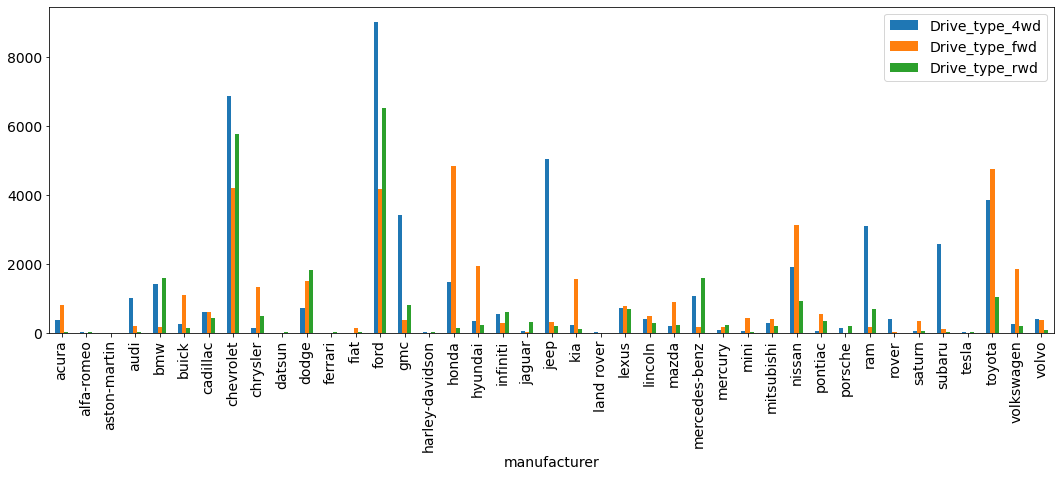

In [ ]:
manufacturer_DriveType.plot(y = ["Drive_type_4wd","Drive_type_fwd", "Drive_type_rwd"], x = "manufacturer", kind = "bar");




From the barchart above, we can see that some of the very popular American brand cars like Ford, chevrolet, Jeep and GMC do favor 4 wheel drive model while the Asian brands are of the front wheel drive model. Perhaps it has something to do with the weather and topography.

##### Q5: WHAT TYPE OF VEHICLES USE DIESEL THE MOST?

To answer this question, we will follow a similar approach as question 4. Since we also know that the fuel column has limited values(5 in particular), we will use the OneHot code system to make it easy to analyse. 

First, we wil create a dataframe with the columns that we require.

In [ ]:
cars5 = cars3_df[["price","year","manufacturer","type","fuel"]]
cars5

,price,year,manufacturer,type,fuel
31,15000,2013.0,ford,truck,gas
32,27990,2012.0,gmc,pickup,gas
33,34590,2016.0,chevrolet,pickup,gas
34,35000,2019.0,toyota,truck,gas
35,29990,2016.0,chevrolet,pickup,gas
...,...,...,...,...,...
426859,48590,2020.0,cadillac,other,gas
426860,39990,2017.0,infiniti,other,gas
426866,32990,2016.0,infiniti,other,gas
426874,33590,2018.0,lexus,sedan,gas


In [ ]:
cars2_OneHot = pd.get_dummies(cars5, columns= ["fuel"], prefix= "fuel type: ")
cars2_OneHot

,price,year,manufacturer,type,fuel type: _diesel,fuel type: _electric,fuel type: _gas,fuel type: _hybrid,fuel type: _other
31,15000,2013.0,ford,truck,0,0,1,0,0
32,27990,2012.0,gmc,pickup,0,0,1,0,0
33,34590,2016.0,chevrolet,pickup,0,0,1,0,0
34,35000,2019.0,toyota,truck,0,0,1,0,0
35,29990,2016.0,chevrolet,pickup,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
426859,48590,2020.0,cadillac,other,0,0,1,0,0
426860,39990,2017.0,infiniti,other,0,0,1,0,0
426866,32990,2016.0,infiniti,other,0,0,1,0,0
426874,33590,2018.0,lexus,sedan,0,0,1,0,0


Next is to group the vehicles according to their type and then count the number of vehicles that use different types of fuel.

In [ ]:
fuel_type = cars2_OneHot.groupby('type')[["fuel type: _diesel", "fuel type: _electric","fuel type: _gas","fuel type: _hybrid","fuel type: _other"]].sum()
fuel_type

,fuel type: _diesel,fuel type: _electric,fuel type: _gas,fuel type: _hybrid,fuel type: _other
type,,,,,
SUV,221.0,23.0,25565.0,188.0,186.0
bus,22.0,0.0,111.0,0.0,8.0
convertible,3.0,1.0,3184.0,11.0,15.0
coupe,18.0,1.0,7846.0,23.0,42.0
hatchback,34.0,78.0,3607.0,559.0,18.0
mini-van,12.0,0.0,2564.0,3.0,8.0
offroad,18.0,0.0,447.0,0.0,0.0
other,57.0,4.0,2772.0,12.0,263.0
pickup,1561.0,0.0,10014.0,3.0,749.0


We can see that of all types of vehicles, Trucks and Pickups use Diesel the most. This is likely because Diesel, though more expensive, is more efficient and less flammable, making it to last longer. And because heavy duty vehicles are slower, they tend to use Diesel which will last them longer.

### Summary And Future Work

At the end of our Analysis, we were able to derive some really interesting insights about the data:

* Likely due to its large population, the U.S state of California has the highest number of advertised vehicles.
* The price of most vehicles on the site are below $20,000.
* Majority of the cars are those that use gasoline as fuel.
* Pickups and trucks use Diesel as fuel more than other types of vehicles.
* American automobile manufacturers seem to produce 4 wheel drive model of vehicles more according to the dataset.
* Ford atomobile vehicles feature the most in the dataset.
* Sedan and SUV are the most featured type of vehicles in the dataset.

For future work, we will be looking to add more images to this project notebook.

We will also look to add more features to some of the graphs plotted in this notebook in order to show more insight.

It will also be nice to get a data on the sales records for the site.

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/sulenas/eda-project


'https://jovian.ai/sulenas/eda-project'

### References

* https://www.kaggle.com/austinreese/craigslist-carstrucks-data
* https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value

* https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.DataFrame.sort_values.html
* https://plotly.com/python/pie-charts/
* https://plotly.com/python
* https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas
* https://stackoverflow.com/questions/35809098/how-to-merge-pandas-value-counts-to-dataframe-or-use-it-to-subset-a-dataframe
* https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/advanced-data-analysis-techniques
* https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/visualization-with-matplotlib-and-seaborn
* https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/interactive-visualization-with-plotly-and-folium

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: 